In [3]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models and Utilities
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model Saving
import joblib

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('ipl_data.csv')

print("Initial Dataset Snapshot:")
print(df.head())

Initial Dataset Snapshot:
   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0    

# Data Preprocessing

dropping unimportant features

In [5]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
columns_to_drop = ['date','runs','wickets','overs','mid','runs_last_5','wickets_last_5','striker','non-striker']

df=df.drop(columns=columns_to_drop, axis=1)

print("Dataset After Dropping Unimportant Features:")
print(df.head())

Dataset After Dropping Unimportant Features:
                   venue               bat_team                    bowl_team  \
0  M Chinnaswamy Stadium  Kolkata Knight Riders  Royal Challengers Bangalore   
1  M Chinnaswamy Stadium  Kolkata Knight Riders  Royal Challengers Bangalore   
2  M Chinnaswamy Stadium  Kolkata Knight Riders  Royal Challengers Bangalore   
3  M Chinnaswamy Stadium  Kolkata Knight Riders  Royal Challengers Bangalore   
4  M Chinnaswamy Stadium  Kolkata Knight Riders  Royal Challengers Bangalore   

       batsman   bowler  total  
0   SC Ganguly  P Kumar    222  
1  BB McCullum  P Kumar    222  
2  BB McCullum  P Kumar    222  
3  BB McCullum  P Kumar    222  
4  BB McCullum  P Kumar    222  


handling missing values

In [7]:
print("Missing values in Each Column:")
print(df.isnull().sum())


Missing values in Each Column:
venue        0
bat_team     0
bowl_team    0
batsman      0
bowler       0
total        0
dtype: int64


no missing values found

Encoding Categorical Variables

In [8]:
label_encoders={}
categorical_features = ['venue', 'bat_team', 'bowl_team','batsman','bowler']

for feature in categorical_features:
  le = LabelEncoder()
  df[feature] = le.fit_transform(df[feature])
  label_encoders[feature] = le

In [9]:
print("Encoded Dataset Snapshot:")
print(df.head())

Encoded Dataset Snapshot:
   venue  bat_team  bowl_team  batsman  bowler  total
0     14         6         12      328     201    222
1     14         6         12       61     201    222
2     14         6         12       61     201    222
3     14         6         12       61     201    222
4     14         6         12       61     201    222


Spitting the data

In [10]:
X = df.drop('total',axis=1)
y = df['total']

70-30

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training and Testing Data Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Training and Testing Data Shapes:
X_train: (53209, 5)
X_test: (22805, 5)
y_train: (53209,)
y_test: (22805,)


# EDA

distribution of target

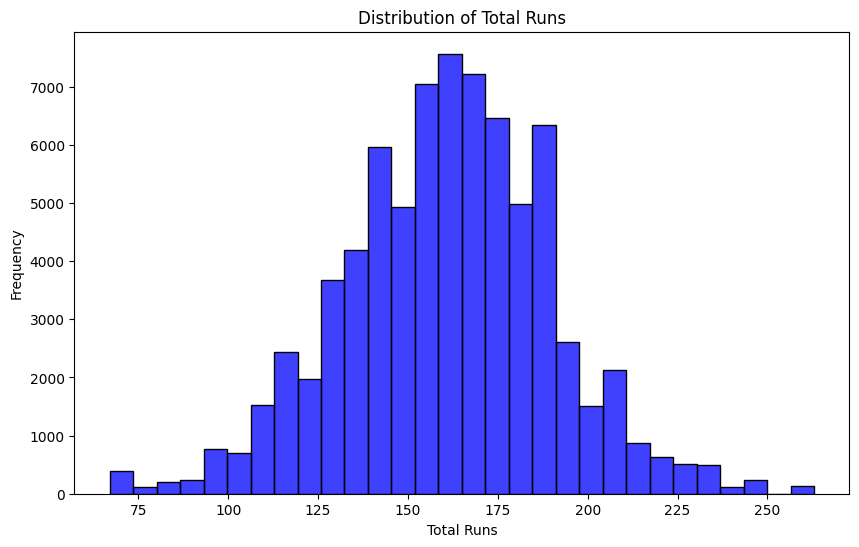

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(y, bins=30, kde=False, color='blue')
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

Runs By Venue

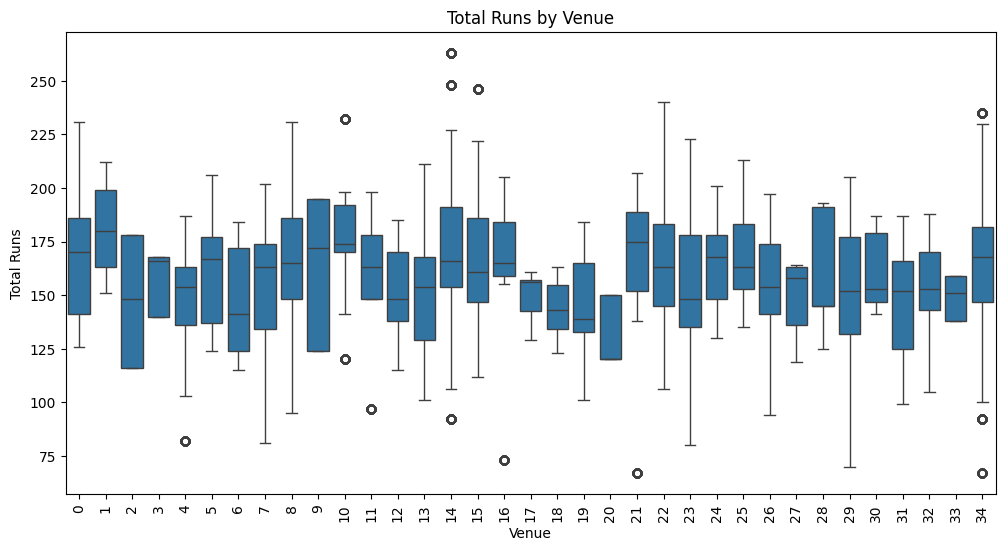

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='venue', y='total', data=df)
plt.title('Total Runs by Venue')
plt.xlabel('Venue')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

Runs by Batting Team

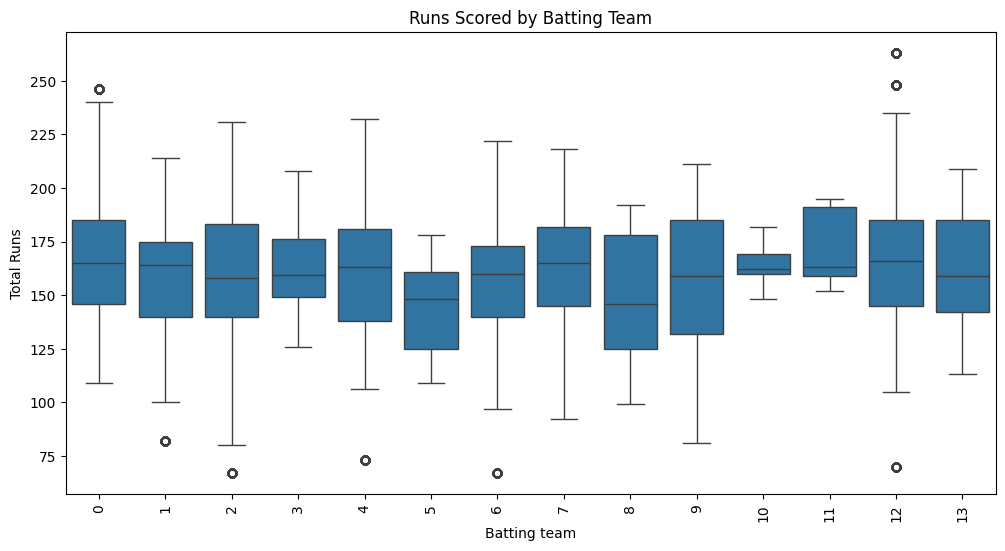

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x='bat_team', y='total', data=df)
plt.title('Runs Scored by Batting Team')
plt.xlabel('Batting team')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

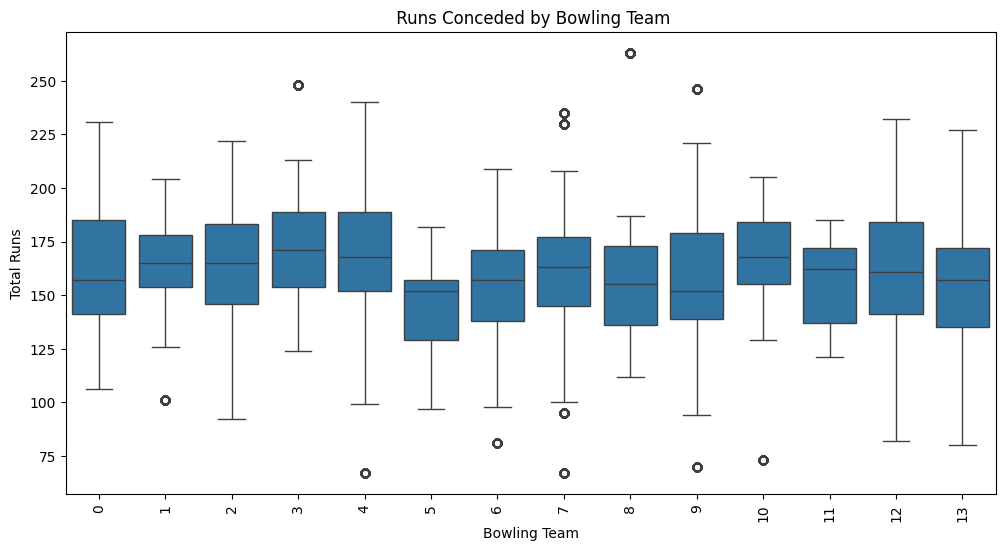

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x='bowl_team', y='total', data=df)
plt.title(' Runs Conceded by Bowling Team')
plt.xlabel('Bowling Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

Correlation Heatmap

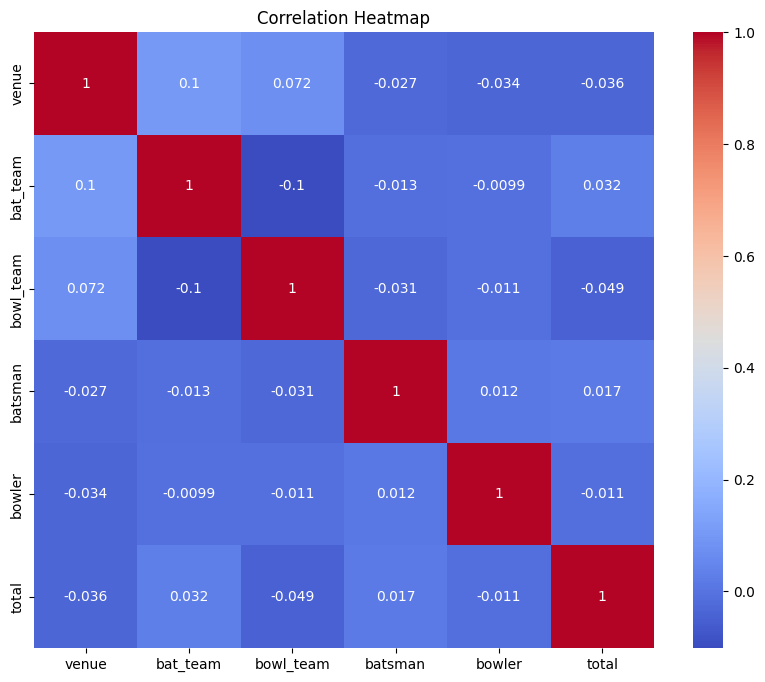

In [16]:
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Pairplot

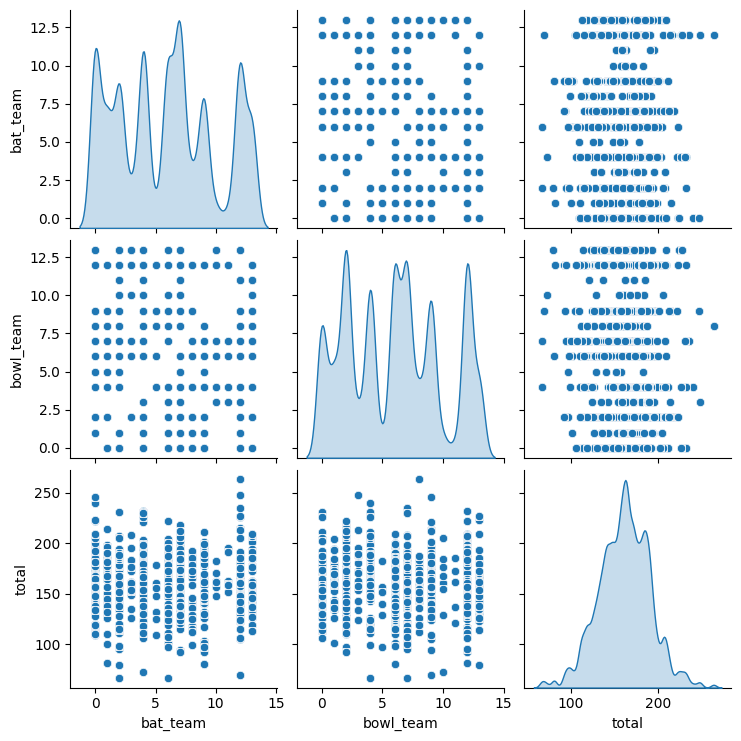

In [17]:
selected_features = ['bat_team', 'bowl_team', 'total']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

# Model Building

## Linear Regression

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [19]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression - MAE: 22.68, MSE: 839.56, R²: 0.00


## Random Forest Regressor

In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

In [21]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

Linear Regression - MAE: 2.14, MSE: 54.46, R²: 0.94


## XGBoost Regressor



In [22]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [23]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Linear Regression - MAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}")

Linear Regression - MAE: 13.71, MSE: 346.23, R²: 0.59


## Deep Learning Model

In [24]:
def create_dl_model(input_dim):
  model = Sequential()
  model.add(Dense(128, input_dim=input_dim, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer='adam',loss='mse')
  return model

In [25]:
input_dm = X_train.shape[1]
dl_model = create_dl_model(input_dm)

In [26]:
history = dl_model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3009.7236 - val_loss: 1624.0497
Epoch 2/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1621.6757 - val_loss: 1107.0167
Epoch 3/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1220.8610 - val_loss: 928.1097
Epoch 4/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1038.1920 - val_loss: 940.5802
Epoch 5/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1002.9361 - val_loss: 871.2078
Epoch 6/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 978.7281 - val_loss: 884.0438
Epoch 7/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 961.2571 - val_loss: 1026.4965
Epoch 8/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 937.1997 - val_loss: 980.0682
Epoch 9/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 935.8568 - val_loss: 1247.3236
Epoch 10/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 925.6528 - val_loss: 880.5184
Epoch 11/50
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 925.440

In [27]:
y_pred_dl = dl_model.predict(X_test).flatten()

mae_dl= mean_absolute_error(y_test, y_pred_dl)
mse_dl = mean_squared_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)


print(f"Deep Learning - MAE: {mae_dl:.2f}, MSE: {mse_dl:.2f}, R²: {r2_dl:.2f}")

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Deep Learning - MAE: 21.29, MSE: 742.78, R²: 0.12


# Model Evaluation

In [28]:
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Deep Learning']
mae = [mae_lr, mae_rf, mae_xgb, mae_dl]
mse = [mse_lr, mse_rf, mse_xgb, mse_dl]
r2 = [r2_lr, r2_rf, r2_xgb, r2_dl]

evaluation_df = pd.DataFrame({
    'Model': models,
    'MAE': mae,
    'MSE': mse,
    'R²': r2
})

print("Model Evaluation Metrics:")
print(evaluation_df)

Model Evaluation Metrics:
               Model        MAE         MSE        R²
0  Linear Regression  22.676220  839.564609  0.004528
1      Random Forest   2.138083   54.464268  0.935422
2            XGBoost  13.714571  346.231317  0.589474
3      Deep Learning  21.292543  742.781089  0.119284


# Hyperparameter Tuning

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


rf_model = RandomForestRegressor(random_state=42)


rf_random_search = RandomizedSearchCV(estimator=rf_model,
                                      param_distributions=param_grid,
                                      n_iter=100,
                                      cv=5,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)


rf_random_search.fit(X_train, y_train)


print("Best Hyperparameters for Random Forest:")
print(rf_random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}


In [30]:
best_rf_model = rf_random_search.best_estimator_

y_pred_rf_tuned = best_rf_model.predict(X_test)

mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"Tuned Random Forest - MAE: {mae_rf_tuned:.2f}, MSE: {mse_rf_tuned:.2f}, R²: {r2_rf_tuned:.2f}")

Tuned Random Forest - MAE: 1.81, MSE: 51.44, R²: 0.94


# Saving Best Model

In [31]:
import joblib

best_model = best_rf_model

joblib.dump(best_model,'model.pkl')
print("Best model saved as model.pkl")

Best model saved as model.pkl
